# Taller 1 - Procesamiento y Etiquetado de Datos - G2

**Docente:** Ph.D. John William Branch  
**Asistente de Docencia:** Sergio Robles

Clasificación y Reconocimiento de Patrones  
Universidad Nacional - Sede Medellin

### Notas del Taller  
* Completar los cinco puntos propuestos
* El dataset a utilizar es el archivo comprimido enviado por correo junto con este notebook

#### Entrega *(Fecha por Definir)*
* El Notebook debe ser enviado al correo: srobles@unal.edu.co
* El Asunto del correo debe ser: **CRP G2 - Taller 1**
* El Correo debe tener adjunto un Notebook resuelto (Archivo con extensión 'ipynb')
* El Correo debe tener adjunto 3 imagenes generadas a partir del último punto

## Librerías

Librerías y paquetes de python a utilizar en el siguiente notebook.  
(Deben estar previamente instalados)

In [1]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import skimage as sk
from skimage import transform
from skimage import util
from sklearn import preprocessing
from scipy import ndarray

In [2]:
# Utils
def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

## Datos No Estructurados

In [3]:
images = []
data = []

#### Primer punto

In [4]:
# Leer las 12 imagenes almacenadas en la ruta data/images y almacenarlas en el array images
# Tip: Utilizar opencv
# Tip: Las imagenes a través de opencv son leidas en formato BGR, cambiar el formato a RGB
for i in range(12):
    img = cv2.imread('data/'+str(i+1)+'.jpg') # Lectura de Imagen
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Transformación de Imagen de BGR a RGB
    images.append(img) # Añadiendo la imagen leida a una lista

#### Segundo punto

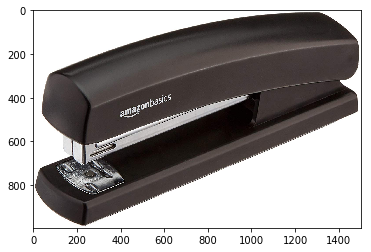

In [5]:
# Imprimir una imagen leida
# Tip: Utilizar matplotlib
index = 0
index += 1

# Función de Matplotlib para ver de una imagen
plt.imshow(images[index])

### Normalización y Otros

#### Tercer punto

In [6]:
images[index].shape

(996, 1500, 3)

In [7]:
images_resize = []

In [8]:
# Realizar un resize a las imagenes almacenas y guardarlas en la variable images_resize (150x150)
# Tip: Utilizar opencv
for i in images:
    aux = cv2.resize(i,(150,150)) # Función para reescalar el tamaño de una imagen
    images_resize.append(aux)

#### Cuarto punto

In [9]:
images_normalize = []

In [10]:
# Realizar un normalizado en la intensidad de colores en las imagenes almacenadas
# Tip: Utilizar opencv o matemáticas

for i in images_resize:
    aux = cv2.normalize(i, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) # Función para Normalizar los valores de intensidad de una imagen
    images_normalize.append(aux)

### Etiquetado

#### Quinto punto

In [11]:
label = ["MonitorF","CosedoraN","SillaB","CuadernoV","GabineteP","CuadernoB","MonitorP","GabineteG","CosedoraR","MonitorV","SillaN","CosedoraP"]

In [12]:
for i in range(len(images)):
    data.append([images[i], label[i]])

In [13]:
for i in range(len(data)):
    print(data[i][1])

MonitorF
CosedoraN
SillaB
CuadernoV
GabineteP
CuadernoB
MonitorP
GabineteG
CosedoraR
MonitorV
SillaN
CosedoraP


In [14]:
# Realizar un etiquetado manual de las imagenes almacenadas en la variable images y almacenarlos en la variable label
# Se deben guardar las imagenes en un diccionario de python, donde cada valor del diccionario es una lista de todas las imagenes que se encuentran en esa clase.
# Ejemplo: mis_datos = { 'perros': [imagen_perro1, imagen_perro2], 'gatos': [imagen_gato1, imagen_gato2] }

mis_datos = { 'Monitores': [1,7,10], 'Cosedora': [2,9,12], 'Silla':[3,11],'Cuadernos':[4,6], 'Gabinete':[5,8]}
mis_datos

{'Monitores': [1, 7, 10],
 'Cosedora': [2, 9, 12],
 'Silla': [3, 11],
 'Cuadernos': [4, 6],
 'Gabinete': [5, 8]}

### Images augmentation

**Sexto punto**  
Utilizar el código para generar 2 nuevas imagenes por cada imagen que se tienen en el dataset. (Solo enviar 3 imagenes generadas)

In [15]:
images = images_normalize

In [16]:
available_transformations = {
    'rotate': random_rotation,
    'noise': random_noise,
    'horizontal_flip': horizontal_flip
}

augmentation_images = []
for img in images:
    num_transformations_to_apply = random.randint(1, len(available_transformations))
    num_transformations = 1
    transformed_image = None
    while num_transformations <= num_transformations_to_apply:
        # choose a random transformation to apply for a single image
        key = random.choice(list(available_transformations))
        img = random.choice(list(images))
        transformed_image = available_transformations[key](img)
        num_transformations += 3
        augmentation_images.append(transformed_image)

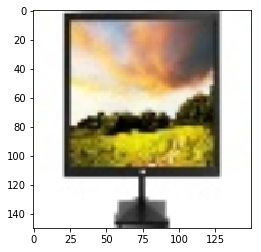

In [17]:
plt.imshow(augmentation_images[1])

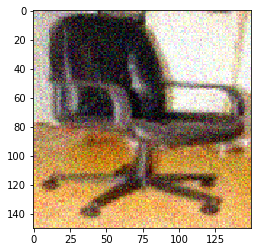

In [18]:
plt.imshow(augmentation_images[4])

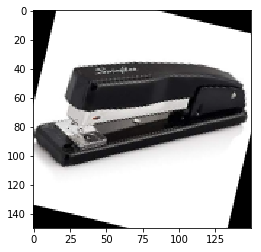

In [19]:
plt.imshow(augmentation_images[2])